In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="ticks")

In [2]:
df = pd.read_csv('breast-cancer-top2.csv')
del df['Unnamed: 0']
del df['2']
df.columns = ['configuration', 'function', 'threshold','epochs','f1']
df

,configuration,function,threshold,epochs,f1
0,"[10, 50]",0,0.5,10,1.000000
1,"[10, 50]",0,0.8,10,0.933333
2,"[10, 50]",0,0.9,10,0.933333
3,"[100, 200]",0,0.5,10,1.000000
4,"[100, 200]",0,0.8,10,1.000000
...,...,...,...,...,...
1939,"[200, 10, 50, 100]",2,0.8,50,0.888889
1940,"[200, 10, 50, 100]",2,0.9,50,0.888889
1941,"[10, 100, 50, 200]",2,0.5,50,1.000000
1942,"[10, 100, 50, 200]",2,0.8,50,1.000000


In [3]:
df['configuration'] = df['configuration'].apply(ast.literal_eval)
df['layers'] = df.apply(lambda x: len(x['configuration']), axis=1)
df['total_nodes'] = df.apply(lambda x: sum(x['configuration']), axis=1)

In [4]:
df

,configuration,function,threshold,epochs,f1,layers,total_nodes
0,"[10, 50]",0,0.5,10,1.000000,2,60
1,"[10, 50]",0,0.8,10,0.933333,2,60
2,"[10, 50]",0,0.9,10,0.933333,2,60
3,"[100, 200]",0,0.5,10,1.000000,2,300
4,"[100, 200]",0,0.8,10,1.000000,2,300
...,...,...,...,...,...,...,...
1939,"[200, 10, 50, 100]",2,0.8,50,0.888889,4,360
1940,"[200, 10, 50, 100]",2,0.9,50,0.888889,4,360
1941,"[10, 100, 50, 200]",2,0.5,50,1.000000,4,360
1942,"[10, 100, 50, 200]",2,0.8,50,1.000000,4,360


<AxesSubplot:xlabel='total_nodes', ylabel='f1'>

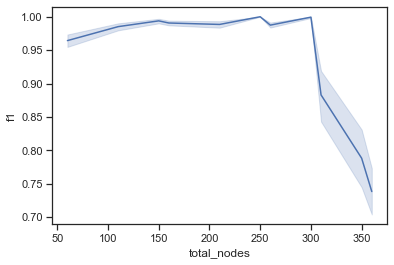

In [5]:
sns.lineplot(data=df, x="total_nodes", y="f1")

<AxesSubplot:xlabel='layers', ylabel='f1'>

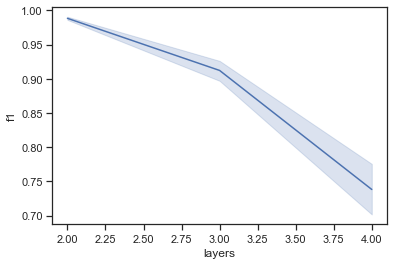

In [6]:
sns.lineplot(data=df, x="layers", y="f1")

<AxesSubplot:xlabel='epochs', ylabel='f1'>

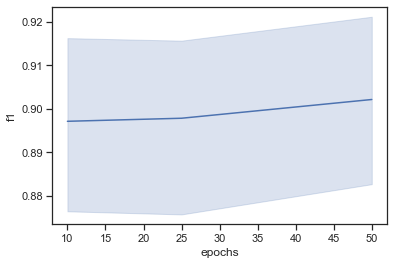

In [7]:
sns.lineplot(data=df, x="epochs", y="f1")

<AxesSubplot:xlabel='threshold', ylabel='f1'>

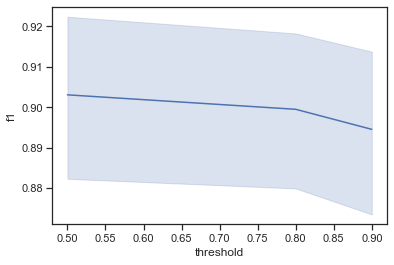

In [8]:
sns.lineplot(data=df, x="threshold", y="f1")

In [9]:
def plot_score_layer(lyrs):
    nn = df[df['layers'] == lyrs]
    for i in range(lyrs):
        layer = 'layer'+str(i+1)
        nn[layer] = nn.apply(lambda x: x['configuration'][i], axis=1)
        sns.lineplot(data=nn, x=layer, y="f1")
        plt.show()

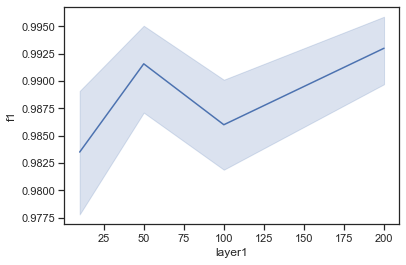

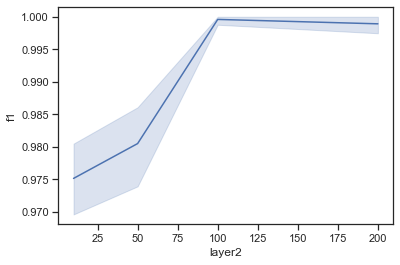

In [10]:
plot_score_layer(2)

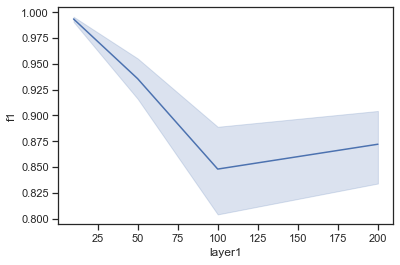

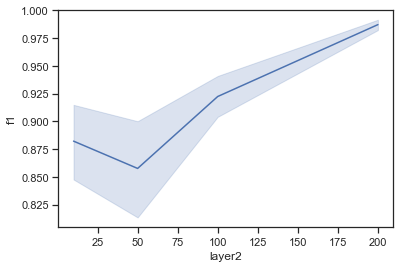

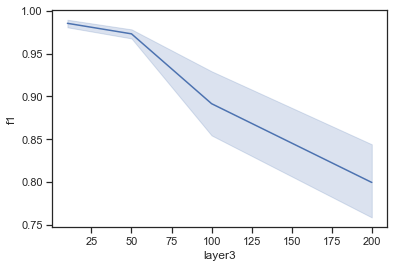

In [11]:
plot_score_layer(3)

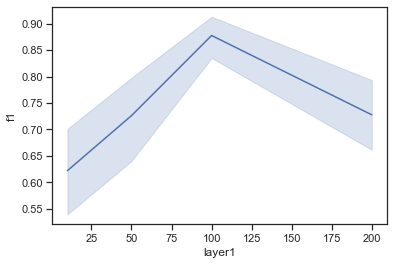

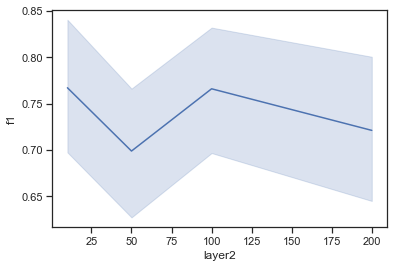

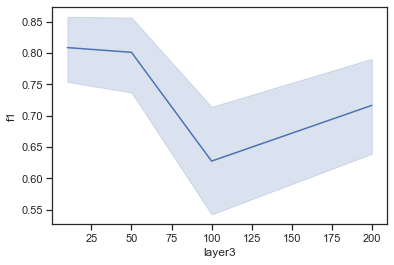

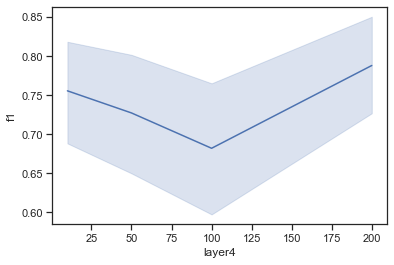

In [12]:
plot_score_layer(4)

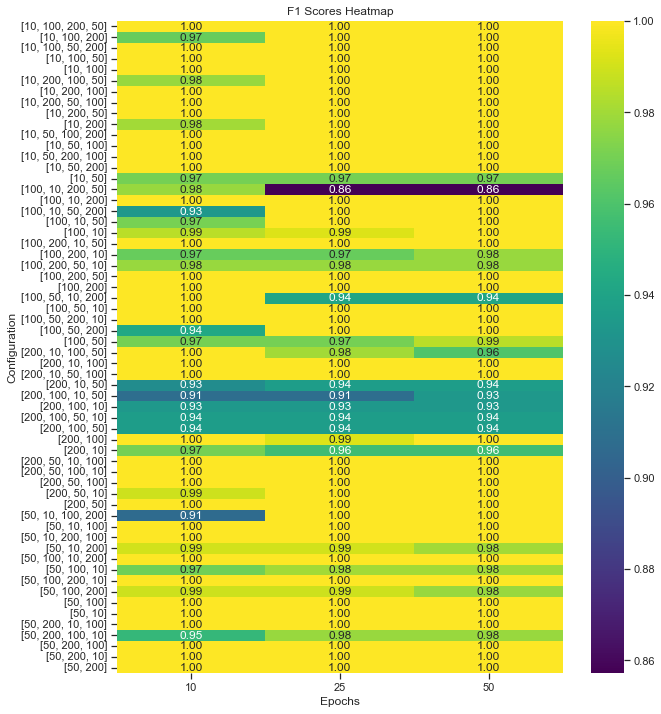

In [13]:
dfr = df[df['function']==0]
dfr['configuration'] = dfr['configuration'].astype(str)
heatmap = dfr.groupby(['configuration', 'epochs'])['f1'].mean().sort_values().unstack()
plt.figure(figsize=(10, 12))  # Adjust the figure size as needed
sns.heatmap(heatmap, cmap='viridis', annot=True, fmt='.2f', cbar=True, xticklabels=True , yticklabels=True)
plt.xlabel('Epochs')
plt.ylabel('Configuration')
plt.title('F1 Scores Heatmap')
plt.show()

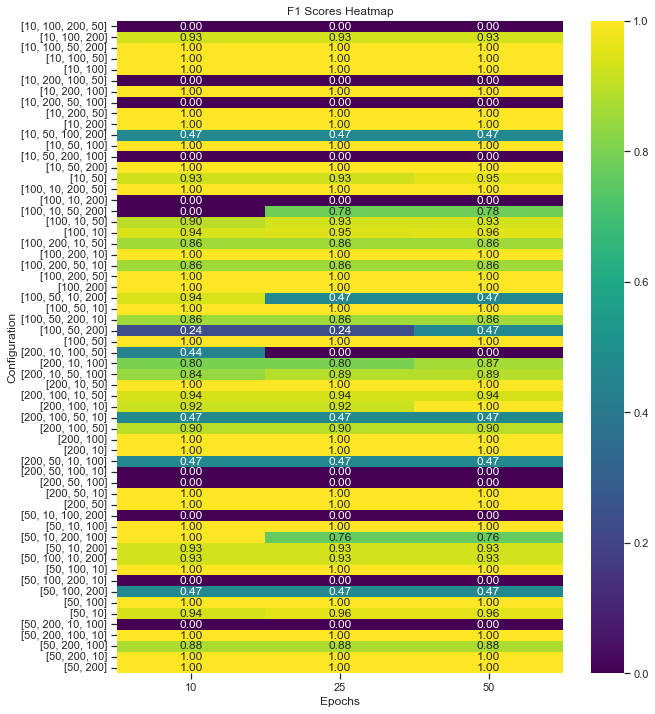

In [14]:
dft = df[df['function']==2]
dft['configuration'] = dft['configuration'].astype(str)
heatmap = dft.groupby(['configuration', 'epochs'])['f1'].mean().sort_values().unstack()
plt.figure(figsize=(10, 12))  # Adjust the figure size as needed
sns.heatmap(heatmap, cmap='viridis', annot=True, fmt='.2f', cbar=True, xticklabels=True , yticklabels=True)
plt.xlabel('Epochs')
plt.ylabel('Configuration')
plt.title('F1 Scores Heatmap')
plt.show()